# 프로젝트: 고양이 수염 스티커 만들기

### 목표
1. dlib를 사용하여 face detection을 수행한다.
2. face landmark로 얼굴의 이목구비를 찾아낸다.
3. 사진에 성공적으로 고양이 수염 스티커를 붙인다.
4. 스티커가 잘 어울리게 약간의 투명도를 준다.

## 0. 공통으로 사용하는 모듈 불러오기

In [960]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 1. 고양이 수염 스티커 붙이기

### 1) 이미지 불러오기

원하는 이미지를 cv2로 불러온다.    
cv2는 사진을 RGB가 아닌 BGR로 가지고오기 때문에 RGBA로 변환해서 변수에 저장시켰다.    
(고양이 수염 스티커가 png 파일로 RGBA 형태를 가지고 있기 때문에 불러온 이미지도 RGBA로 변환했다.)

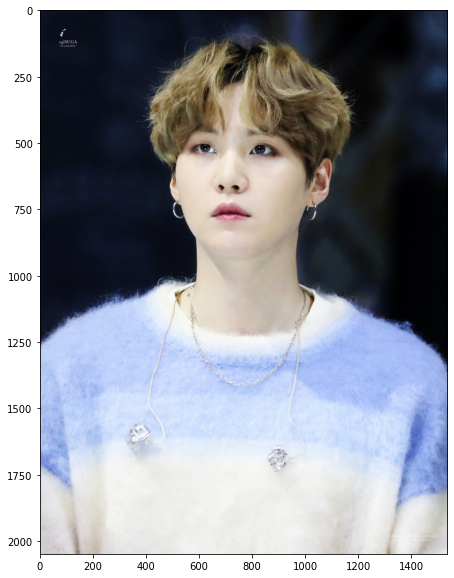

In [961]:
import os
my_image_root_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/image2.png'

img_brg = cv2.imread(my_image_root_path)
img_show = img_brg.copy()
img_rgb = cv2.cvtColor(img_brg, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.show()

### 2) face detection

dlib를 이용해 얼굴을 인식하는 방법은 두가지가 있다.    
1. HOG + Linear SVM
2. MMOD CNN
이 프로젝트에서는 1번을 사용하기로 했다.    
(2번은 사전에 훈련된 `mmod_human_face_detector.dat`가 있어야 하므로 추후 시도해보기로 하자.)

In [962]:
import dlib
detector_hog = dlib.get_frontal_face_detector() # HOG + Linear SVM dectector 함수
dlib_rects = detector_hog(img_show, 1)
print(dlib_rects)

rectangles[[(502, 400) (964, 862)]]


만들어진 얼굴영역이 잘 잡혔는지 확인해보았다.

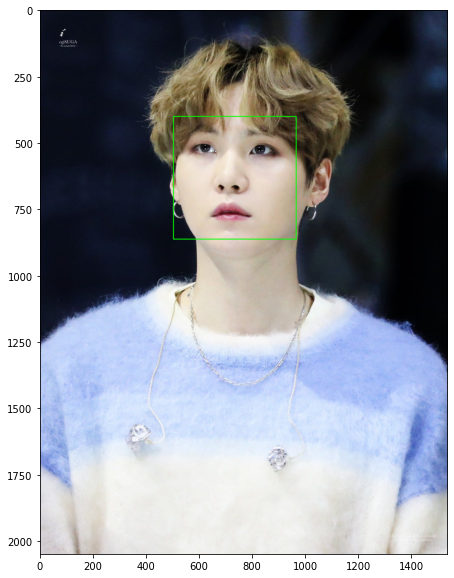

In [963]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_show_rgb)
plt.show()

위 사진을 보니 잘 잡힌 것을 알 수 있었다.

### 3) face landmark

위에서 찾은 dlib_rects 안에 이목구비를 찾아보자.   

In [964]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

위 model_path에 해당하는 파일이 없을 경우    
`!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2` 으로 다운받을 수 있다.    

In [965]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

지금 사용하는 이미지는 얼굴이 하나임을 알고 있다.    
따라서 프로젝트 진행 시 landmark 위치를 쉽게 찾기 위해서 point_pos라는 리스트에 따로 저장을 하였다.

In [966]:
rect_width = 0
rect_height = 0
point_pos=[]
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    point_pos=landmark
    rect_width = dlib_rect.width()
    rect_height = dlib_rect.height()

찾아진 landmark를 확인하면 다음과 같다.

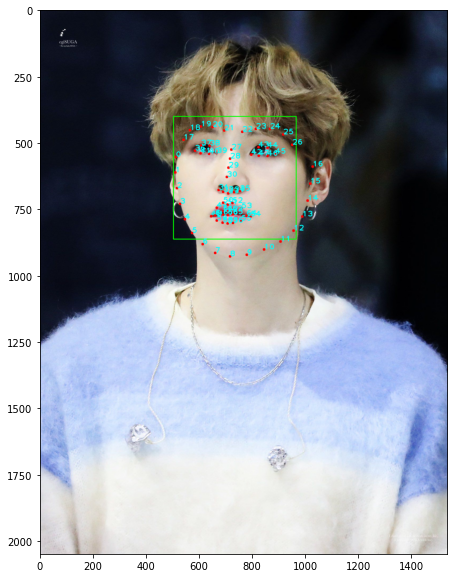

In [967]:
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):  
        cv2.circle(img_show_rgb,point, 5, (255, 0, 0),-1)
        cv2.putText(img_show_rgb, str(idx), point, cv2.FONT_HERSHEY_PLAIN, 2,(0, 255, 255),2,cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img_show_rgb)
plt.show()

### 4) 고양이 수염 스티커를 붙여보자

일단 고양이 수염 사진을 불러오면

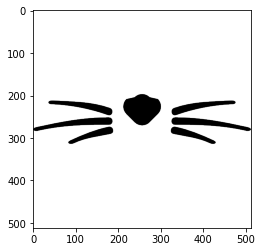

(512, 512, 4)


In [968]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'

img_sticker = cv2.imread(sticker_path, -1)
plt.imshow(img_sticker)
plt.show()
print(img_sticker.shape)

고양이 수염에서 주요 좌표가 되는 부분을 구해보자.   
(자동으로 각 점의 좌표를 구해주는 것이 있으면 좋겠으나 아직 그런 기능을 가진 모듈을 발견 못했기 때문에 일일이 찾으려 한다.)    

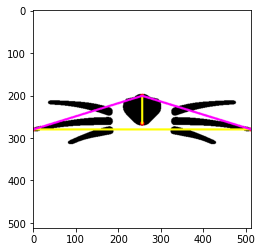

In [969]:
img_sticker_find_pos = img_sticker.copy()
img_sticker_find_pos = cv2.cvtColor(img_sticker_find_pos, cv2.COLOR_BGR2RGB)
cv2.circle(img_sticker_find_pos,(0,280), 5, (255, 0, 0), -1) # 왼쪽 끝
cv2.circle(img_sticker_find_pos,(img_sticker_find_pos.shape[0],280), 5, (255, 0, 0), -1) # 왼쪽 끝
cv2.circle(img_sticker_find_pos,(img_sticker_find_pos.shape[0]//2, img_sticker_find_pos.shape[1]//2-55), 5, (255, 0, 0), -1) # 콧망울의 위쪽
cv2.circle(img_sticker_find_pos,(img_sticker_find_pos.shape[0]//2, img_sticker_find_pos.shape[1]//2+10), 5, (255, 0, 0), -1) # 콧망울의 아래쪽
top_nose = (img_sticker_find_pos.shape[0]//2, img_sticker_find_pos.shape[1]//2-55)
bottom_nose = (img_sticker_find_pos.shape[0]//2, img_sticker_find_pos.shape[1]//2+10)
lft_end = (0,280)
rgt_end = (img_sticker_find_pos.shape[0],280)
cv2.line(img_sticker_find_pos,top_nose,bottom_nose, (255, 255, 0), 3)
cv2.line(img_sticker_find_pos,lft_end,rgt_end, (255, 255, 0), 3)
cv2.line(img_sticker_find_pos,lft_end,top_nose, (255, 0, 255), 3)
cv2.line(img_sticker_find_pos,rgt_end,top_nose, (255, 0, 255), 3)
plt.imshow(img_sticker_find_pos)
plt.show()

In [970]:
# 가장 끝에 위치하는 고양이 수염은 사진의 중간과 -24정도 차이가 난다.
img_sticker_find_pos.shape[1]//2 - lft_end[1]

-24

In [971]:
# 고양이 콧망울의 높이는 65이다.
abs(top_nose[1]-bottom_nose[1])

65

이미지의 어느 위치에 고양이 수염을 붙일 지 파악해보자.

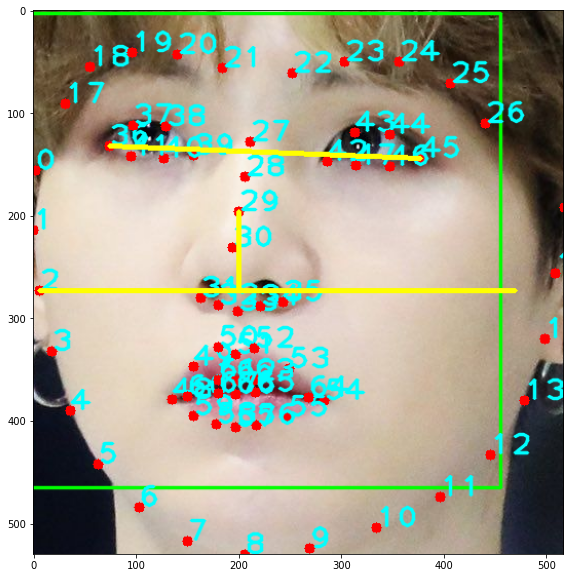

In [972]:
# 자세한 확인을 위해 dlib_rect의 위치를 확대시킨다.
img_test = img_show_rgb.copy()


#cv2.putText(img_show_rgb, str(idx), point, cv2.FONT_HERSHEY_PLAIN, 2,(0, 255, 255),2,cv2.LINE_AA)
plt.figure(figsize=(10,10))
cv2.line(img_test,point_pos[29],(point_pos[29][0],point_pos[2][1]) , (255, 255, 0), 3)
cv2.line(img_test,point_pos[36],point_pos[45], (255, 255, 0), 3)
cv2.line(img_test,point_pos[2],(point_pos[2][0]+rect_width,point_pos[2][1]), (255, 255, 0), 3)
img_test = img_test[point_pos[30][1]-rect_height//2:point_pos[8][1], point_pos[1][0]:point_pos[16][0]]
plt.imshow(img_test)
plt.show()

In [973]:
# 눈 양쪽 끝의 기울기
import math
eyes_angle = math.degrees(math.atan2(point_pos[45][1]-point_pos[36][1],point_pos[45][0]-point_pos[36][0]))
eyes_angle

2.2679545359058344

대략적인 고양이 수염의 위치를 그려본 결과 각도는 눈 양쪽 끝의 기울기이고, 너비는 landmark 2번의 x좌표부터 26번의 x좌표까지인 것이 자연스러울 것이라 생각했다.
결과에 맞게 고양이 수염 이미지를 수정해보자.

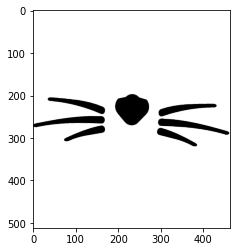

(512, 463, 4)

In [974]:
img_sticker_find_pos = img_sticker.copy()
top_nose = (img_sticker_find_pos.shape[0]//2, img_sticker_find_pos.shape[1]//2-55)
bottom_nose = (img_sticker_find_pos.shape[0]//2, img_sticker_find_pos.shape[1]//2+10)
lft_end = (0,280)
rgt_end = (img_sticker_find_pos.shape[0],280)
# image resize
sticker_width = abs(int(rect_width))
sticker_height = img_sticker_find_pos.shape[1]
img_sticker_find_pos = cv2.resize(img_sticker_find_pos, (sticker_width, sticker_height), interpolation=cv2.INTER_AREA) 
# image rotate
rows, cols = img_sticker_find_pos.shape[:2]
rotate_angle = cv2.getRotationMatrix2D((cols/2,rows/2),-eyes_angle,1) 
img_sticker_find_pos= cv2.warpAffine(img_sticker_find_pos, rotate_angle,(cols, rows), borderValue=(255,255,255))
plt.imshow(img_sticker_find_pos)
plt.show()
img_sticker_find_pos.shape

cat_whiskers는 png파일로 bgra이고, 얼굴 이미지는 bgr이여서 shape가 맞지 않는다. 때문에 shape를 맞춰 이미지 연산을 하기 위해서 bgra로 변환했다.

In [975]:
img_show = img_show.copy()
img_show = cv2.cvtColor(img_copy, cv2.COLOR_BGR2BGRA)
print(img_show.shape)

(2048, 1536, 4)


고양이 수염의 중간의 위치는 코의 위치와 맞아야 한다.    
따라서
$$x = x_{nose}-\frac{sticker_{width}}{2}$$
$$y = y_{nose}-\frac{sticker_{height}}{2}$$

In [976]:
resize_y = point_pos[30][1]-(img_sticker_find_pos.shape[0]//2)
resize_x = point_pos[30][0]-(img_sticker_find_pos.shape[1]//2)

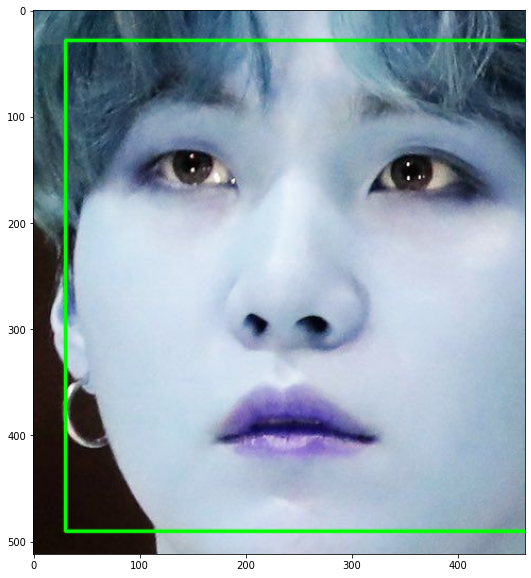

(512, 463, 4)

In [977]:
sticker_area = img_show[resize_y:resize_y+img_sticker_find_pos.shape[0],resize_x:resize_x+img_sticker_find_pos.shape[1]]
plt.figure(figsize=(10,10))
plt.imshow(sticker_area)
plt.show()
sticker_area.shape

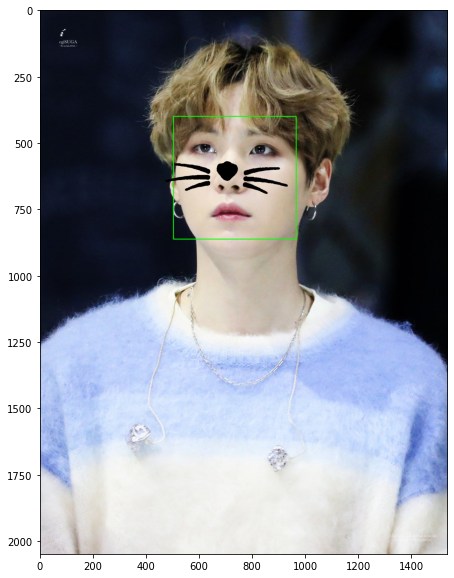

In [978]:
img_show[resize_y:resize_y+img_sticker_find_pos.shape[0],resize_x:resize_x+img_sticker_find_pos.shape[1]]= \
    np.where(img_sticker_find_pos!=0,sticker_area,img_sticker_find_pos).astype(np.uint8)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

성공적으로 고양이 수염을 붙였으니 원본 이미지에 붙이면 다음과 같다.

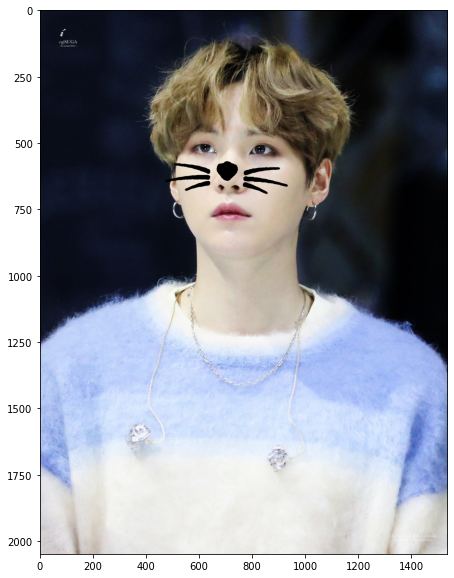

In [979]:
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_RGBA2BGRA)
sticker_area = img_rgb[resize_y:resize_y+img_sticker_find_pos.shape[0],resize_x:resize_x+img_sticker_find_pos.shape[1]]

img_rgb[resize_y:resize_y+img_sticker_find_pos.shape[0],resize_x:resize_x+img_sticker_find_pos.shape[1]]= \
    np.where(img_sticker_find_pos!=0,sticker_area,img_sticker_find_pos).astype(np.uint8)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.show()

# 결론

## 

# Reference
* https://www.pyimagesearch.com/2021/04/19/face-detection-with-dlib-hog-and-cnn/
* https://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html
* https://bkshin.tistory.com/entry/OpenCV-13-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%9D%B4%EB%8F%99Translation-%ED%99%95%EB%8C%80%EC%B6%95%EC%86%8CScaling-%ED%9A%8C%EC%A0%84Rotation